In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [2]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 4.1MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=75ac4bbe7497860692bfc7ed4e39ed785e26c8a4c26c8030cf94ec9b5147626e
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 2.8MB/s 
     |████████████████████████████████| 983kB 2.4MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=355c13f80de2f2a695e485c5f0272c585d7714c433d083942092382ae517abae
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [5]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [4]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data


In [ ]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [7]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [8]:
#Importing Various twitter data
# all JP files
#Complaint
df_com = pd.read_json('pretty_gs_tweets_complaint.json')

#Feedback
df_feed = pd.read_json('pretty_gs_tweets_feedback.json')

#Request
df_req = pd.read_json('pretty_gs_tweets_request.json')


In [9]:
df = pd.concat([df_com,df_feed,df_req])

In [10]:
#Sentiment Analysis
#Vader Sentiment

In [11]:
analyzer = SentimentIntensityAnalyzer()

In [12]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))

In [13]:
#Inserting the sentiment into the dataframe
df = pd.concat([df, sentiment.apply(pd.Series)],1)

In [14]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [15]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

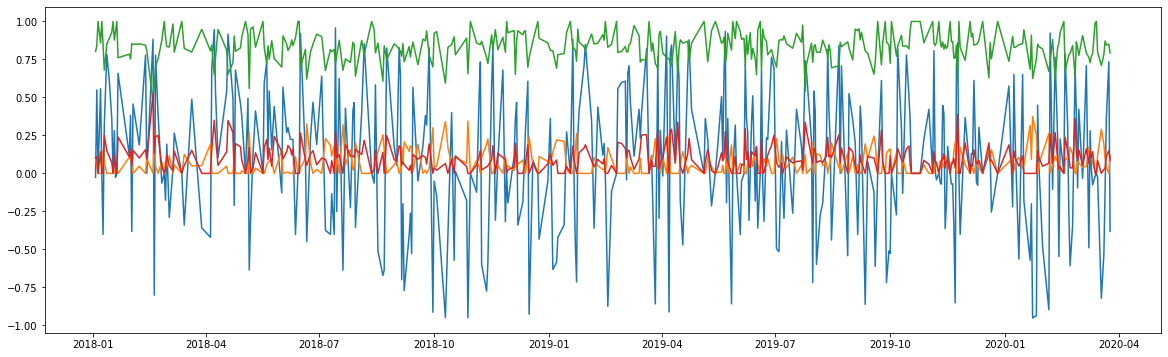

In [16]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df.groupby('date').mean()['compound'].index, df.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df.groupby('date').mean()['neg'].index, df.groupby('date').mean()['neg'].values)
plt.plot(df.groupby('date').mean()['neu'].index, df.groupby('date').mean()['neu'].values)
plt.plot(df.groupby('date').mean()['pos'].index, df.groupby('date').mean()['pos'].values)

In [17]:
df['text'].iloc[0]
#As we can see, several of the tweets captures donot refer to morgan stanley. Hence we need to filter out these tweets

'California regulator @CA_DaveJones cracks down on insurers tied to Apollo and Goldman Sachs over policyholder complaints, @k_chiglinsky reports. Full story on the Terminalpic.twitter.com/y4kv7THvzp'

In [18]:
Filter = df['text'].apply(lambda x: 'jp' in x.lower())
df_filter = df[Filter]
df_filter.shape
df_filter['text'].iloc[0]

'Lloyd’s (EU headquarters ), Barclays (EU headquarters), Bank of America, Goldman Sachs, Merrill Lynch, JP Morgan and lots of others have brass plated functions to protect themselves (including Mr Rees Mogg’s firm). We’re quite happy with the additional taxes, no complaints!'

Text(0, 0.5, 'Sentiment')

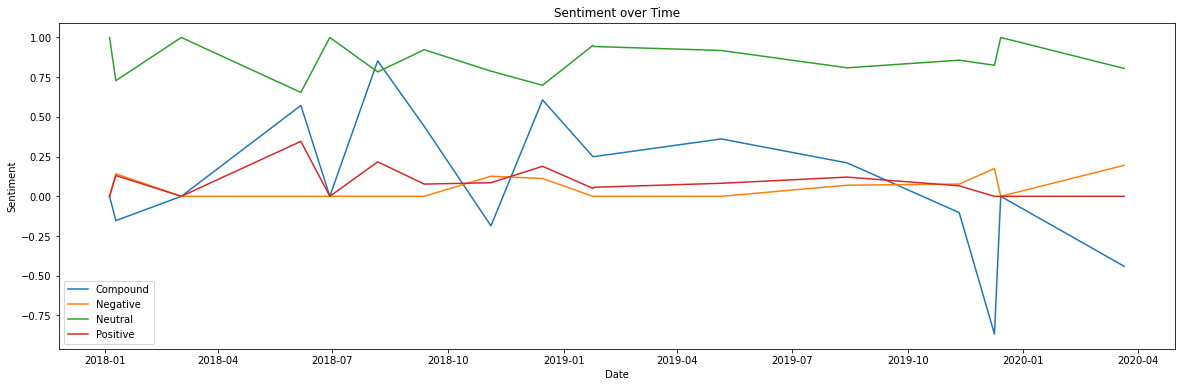

In [19]:
plt.figure(figsize = (20,6))
plt.plot(df_filter.groupby('date').mean()['compound'].index, df_filter.groupby('date').mean()['compound'].values, label = 'Compound')
plt.plot(df_filter.groupby('date').mean()['neg'].index, df_filter.groupby('date').mean()['neg'].values, label = 'Negative')
plt.plot(df_filter.groupby('date').mean()['neu'].index, df_filter.groupby('date').mean()['neu'].values, label = 'Neutral')
plt.plot(df_filter.groupby('date').mean()['pos'].index, df_filter.groupby('date').mean()['pos'].values, label = 'Positive')

plt.legend(loc = 'best')
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

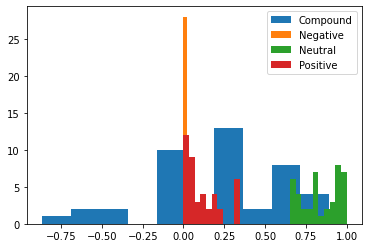

In [20]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

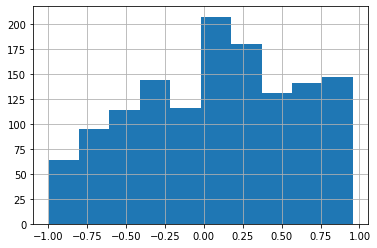

In [21]:
df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [22]:
df.iloc[:,-4:-1]

,neu,pos,compound
0,0.891,0.000,-0.4019
1,0.891,0.000,-0.4019
2,0.941,0.000,-0.4019
3,0.672,0.000,-0.4404
4,0.941,0.000,-0.4019
...,...,...,...
727,0.793,0.090,-0.2617
728,1.000,0.000,0.0000
729,0.941,0.059,0.4215
730,1.000,0.000,0.0000


In [23]:
#Importing Various twitter data
# all JP files
#Complaint
df_com = pd.read_json('pretty_gs_tweets_complaint.json')

#Feedback
df_feed = pd.read_json('pretty_gs_tweets_feedback.json')

#Request
df_req = pd.read_json('pretty_gs_tweets_request.json')


In [24]:
df = pd.concat([df_com,df_feed,df_req])

In [25]:
#LDAVIS
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

     |████████████████████████████████| 1.6MB 2.7MB/s 
     |████████████████████████████████| 552kB 17.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=8c604433ac32bfaf18435f1f297ebab6faa637fe15366ef494ab8eb0524fa746
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=990428d0c989701139aa46e30f80361c66e36b35eb8849cfe121e3904288ae04
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [26]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [27]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(df['text'].values)
print(dtm_tf.shape)

(1339, 452)


In [28]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [29]:
#dtm_tfidf = tfidf_vectorizer.fit_transform(df['text'].values)
#lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
#lda_tfidf.fit(dtm_tfidf)
#pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

In [30]:
sentiment_wm = df['text'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df, sentiment_wm.apply(pd.Series)],1)

In [31]:
df.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,neg,neu,pos,compound
0,True,[],[https://pbs.twimg.com/media/Dfg7RdjVAAAt_H5.jpg],False,False,6,[],,0,[],4,ZTracer,California regulator @CA_DaveJones cracks down...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-06-12 19:30:33,2018-06-12 19:30:33,1006619785176723456,/ZTracer/status/1006619785176723456,14622223,Zachary Tracer,,0.109,0.891,0.0,-0.4019
1,True,[],[https://pbs.twimg.com/media/Dfg7RdjVAAAt_H5.jpg],False,False,6,[],,0,[],4,ZTracer,California regulator @CA_DaveJones cracks down...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-06-12 19:30:33,2018-06-12 19:30:33,1006619785176723456,/ZTracer/status/1006619785176723456,14622223,Zachary Tracer,,0.109,0.891,0.0,-0.4019
2,False,[],[],False,False,0,[],,0,[],0,WytchesThyme,I am Prudence Shagwell formerly Chantal Maudui...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-05 21:36:03,2018-04-05 21:36:03,982008992464556032,/WytchesThyme/status/982008992464556032,884958231558328320,Joan Mikolajczyk,,0.059,0.941,0.0,-0.4019
3,True,[],[https://pbs.twimg.com/media/DaBr-KhV4AE-YJe.jpg],False,False,0,[http://dlvr.it/QNXKT0],,0,[],0,007_goldman,Jamie Dimon backs Trump's 'legitimate complain...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-05 14:36:38,2018-04-05 14:36:38,981903441638273024,/007_goldman/status/981903441638273025,762395456907284480,Goldman007,,0.328,0.672,0.0,-0.4404
4,False,[],[],False,False,0,[],,0,[],0,WytchesThyme,I am Prudence Shagwell formerly Chantal Maudui...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-05 21:36:03,2018-04-05 21:36:03,982008992464556032,/WytchesThyme/status/982008992464556032,884958231558328320,Joan Mikolajczyk,,0.059,0.941,0.0,-0.4019


In [32]:
df_pos = df[df['compound'] >= 0.05]
df_neg = df[df['compound'] <= -0.05]
df_neu = df[( df['compound'] < 0.05 ) & ( df['compound'] > -0.05 )]


In [33]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.025883  0.028170       1        1  12.935141
2      0.002285 -0.145023       2        1  11.147247
5     -0.118330  0.070058       3        1  11.030304
6      0.280291 -0.050847       4        1  10.885843
0     -0.022748  0.117495       5        1  10.399620
1     -0.167350 -0.099163       6        1  10.115949
4      0.112394  0.142788       7        1   8.805979
8     -0.140352  0.037106       8        1   8.796601
7      0.004180  0.011745       9        1   8.431193
3      0.023748 -0.112329      10        1   7.452124, topic_info=           Term       Freq      Total Category  logprob  loglift
93          oil  18.000000  18.000000  Default  30.0000  30.0000
133        stop  14.000000  14.000000  Default  29.0000  29.0000
132  stockpiles  13.000000  13.000000  Default  28.0000  28.0000
38    dwindling  13.000000  13.000000  Default  27.0000  27.0000
131      status  15.000000  15.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
123         say   0.564596   6.680141  Topic10  -5.2700   0.1259
113     request   4.886739  58.510312  Topic10  -3.1118   0.1140
44     feedback   2.890787  49.302483  Topic10  -3.6368  -0.2398
93          oil   1.335717  18.005948  Topic10  -4.4089  -0.0046
32          did   0.952400  13.219850  Topic10  -4.7471  -0.0338

[394 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
0         1  0.200732            able
0         6  0.802929            able
1         1  0.231549             add
1         8  0.463099             add
2         4  0.543252  administration
...     ...       ...             ...
162       2  0.329444            year
162       3  0.164722            year
162       5  0.164722            year
162       7  0.164722            year
162       8  0.329444            year

[516 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 3, 6, 7, 1, 2, 5, 9, 8, 4])

In [34]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.095967  0.079306       1        1  14.079401
9      0.261106  0.187412       2        1  11.937190
5      0.187288 -0.210794       3        1  11.855214
6     -0.031163  0.085499       4        1  10.435422
4     -0.134153 -0.089192       5        1  10.309048
7     -0.143242  0.023845       6        1   9.538542
0     -0.018333  0.023961       7        1   8.873086
3     -0.095862  0.027006       8        1   8.860419
8      0.037618 -0.111268       9        1   7.307148
2      0.032707 -0.015775      10        1   6.804529, topic_info=          Term       Freq      Total Category  logprob  loglift
13        card  18.000000  18.000000  Default  30.0000  30.0000
4        apple  19.000000  19.000000  Default  29.0000  29.0000
112    request  43.000000  43.000000  Default  28.0000  28.0000
45    feedback  23.000000  23.000000  Default  27.0000  27.0000
113   requests  17.000000  17.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
71     katzman   0.103862   3.552774  Topic10  -6.7281  -0.8448
19   corporate   0.103862   3.727720  Topic10  -6.7281  -0.8929
57       house   0.104086   5.293722  Topic10  -6.7259  -1.2415
46        file   0.104002   6.015542  Topic10  -6.7267  -1.3701
31   documents   0.103996   5.141281  Topic10  -6.7268  -1.2131

[371 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.167777  actually
0         4  0.167777  actually
0         6  0.167777  actually
0         7  0.335553  actually
1         3  0.886348      adam
...     ...       ...       ...
154       1  0.123823     years
154       7  0.866761     years
155       2  0.761481      york
155       3  0.152296      york
155       7  0.076148      york

[392 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 6, 7, 5, 8, 1, 4, 9, 3])

In [35]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.185770  0.057145       1        1  19.209358
6     -0.140124  0.152024       2        1  18.988743
4     -0.085698  0.205990       3        1  11.452845
5      0.240408 -0.052142       4        1   9.305594
9     -0.244923 -0.072545       5        1   8.613745
7      0.255546  0.126675       6        1   8.238297
1      0.002991 -0.277874       7        1   8.043219
3      0.016207 -0.233142       8        1   6.237145
0      0.171999  0.095998       9        1   6.115249
2     -0.030636 -0.002128      10        1   3.795805, topic_info=        Term       Freq      Total Category  logprob  loglift
11     sachs  28.000000  28.000000  Default  14.0000  14.0000
3   feedback  23.000000  23.000000  Default  13.0000  13.0000
10  requests  21.000000  21.000000  Default  12.0000  12.0000
9    records  14.000000  14.000000  Default  11.0000  11.0000
4       http  19.000000  19.000000  Default  10.0000  10.0000
..       ...        ...        ...      ...      ...      ...
4       http   0.633737  19.434488  Topic10  -2.6391  -0.1519
10  requests   0.633737  21.687369  Topic10  -2.6391  -0.2616
3   feedback   0.633737  23.819768  Topic10  -2.6391  -0.3554
2        com   0.633738  25.473069  Topic10  -2.6391  -0.4225
11     sachs   0.633737  28.258047  Topic10  -2.6391  -0.5262

[154 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         2  0.206565      bank
0         7  0.619696      bank
0        10  0.103283      bank
1         6  0.886696   clients
1        10  0.110837   clients
2         1  0.353314       com
2         2  0.353314       com
2         3  0.196286       com
2         5  0.039257       com
2        10  0.039257       com
3         1  0.209910  feedback
3         5  0.755675  feedback
3        10  0.041982  feedback
4         3  0.771824      http
4         6  0.154365      http
4        10  0.051455      http
5         1  0.107724     https
5         2  0.807927     https
5        10  0.053862     https
6         7  0.873547      just
6        10  0.079413      just
7         1  0.236322       new
7         2  0.590806       new
7        10  0.118161       new
8         1  0.852889       pic
8        10  0.085289       pic
9         8  0.902955   records
9        10  0.069458   records
10        2  0.184439  requests
10        6  0.184439  requests
10        9  0.599427  requests
10       10  0.046110  requests
11        1  0.106164     sachs
11        4  0.743151     sachs
11        6  0.106164     sachs
11       10  0.035388     sachs
12        1  0.786762   twitter
12        2  0.121040   twitter
12       10  0.060520   twitter
13        2  0.496592       www
13        3  0.425650       www
13       10  0.070942       www, R=14, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 5, 6, 10, 8, 2, 4, 1, 3])

In [36]:
print(df_pos.shape)
print(df_neg.shape)
print(df_neu.shape)

(635, 25)
(519, 25)
(185, 25)
